In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
x = np.random.randint(low=1, high=100, size=10)
print(x)

[38 13 73 10 76  6 80 65 17  2]


In [3]:
x = np.sort(x)
x = x.reshape(x.shape[0],1)

In [4]:
print(x)

[[ 2]
 [ 6]
 [10]
 [13]
 [17]
 [38]
 [65]
 [73]
 [76]
 [80]]


In [5]:
y = np.random.randint(low=1,high=1001,size=10)
print(y)

[973 584 750 509 391 282 179 277 255 358]


In [6]:
y = np.sort(y)

In [7]:
y = np.flip(y)
y = y.reshape(y.shape[0],1)
print(y.shape)

(10, 1)


In [8]:
print(y)

[[973]
 [750]
 [584]
 [509]
 [391]
 [358]
 [282]
 [277]
 [255]
 [179]]


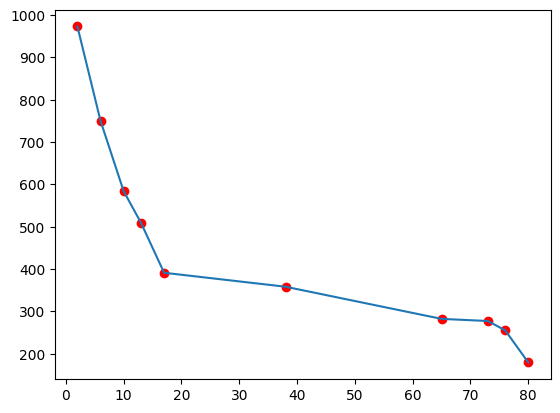

In [9]:
plt.scatter(x,y,color='r')
plt.plot(x,y)

In [10]:
def mean_squared_error(y,y_hat):
    m = y.shape[0]
    cost = (1/(m))* np.sum((y-y_hat)**2)
    return cost

In [11]:
def sgd(x,y,iteration=10,learning_rate=0.0001):
    costs = []
    weight = []
    curr_w1 = 0.1
    curr_w0 = 0.01
    m = y.shape[0]
    for i in range(iteration):
        for j in range(0,m):
            y_hat = curr_w1*x[j]+curr_w0
            cost = mean_squared_error(y[j],y_hat)
            costs.append(cost)
            weight.append(curr_w1)

            w1_deri = -(2/(j+1))*np.sum(x[j]*(y[j]-y_hat))
            w0_deri = -(2/(j+1))*np.sum(y[j]-y_hat)

            curr_w1 = curr_w1-(learning_rate*w1_deri)
            curr_w0 = curr_w0-(learning_rate*w0_deri)

    plt.plot(weight, costs)
    plt.scatter(weight, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    return curr_w1, curr_w0

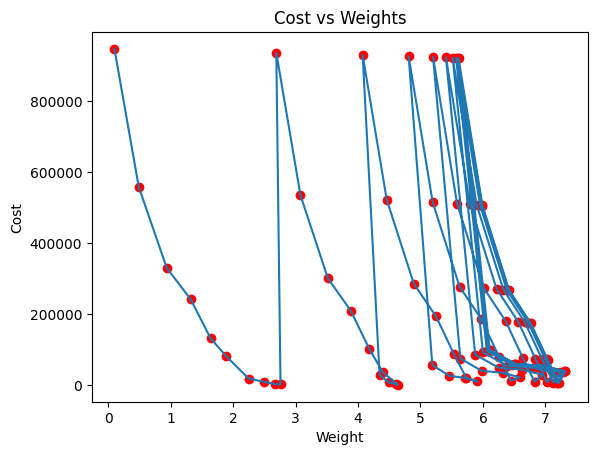

w =  5.613006372148176
b =  3.2121782091337217


In [12]:
w,b = sgd(x,y)
print("w = ",w)
print("b = ",b)

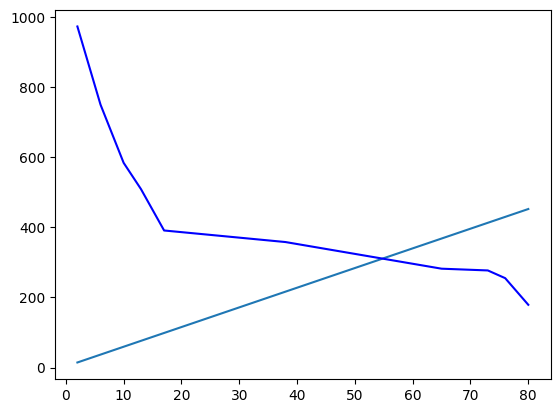

In [13]:
y_hat = w*x+b
plt.plot(x,y_hat)
plt.plot(x,y,color='b')

In [14]:
loss = y - y_hat

In [15]:
itr = np.arange(len(loss))

In [16]:
print(itr)

[0 1 2 3 4 5 6 7 8 9]


In [17]:
itr = itr.reshape(itr.shape[0],1)

In [18]:
print(itr)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


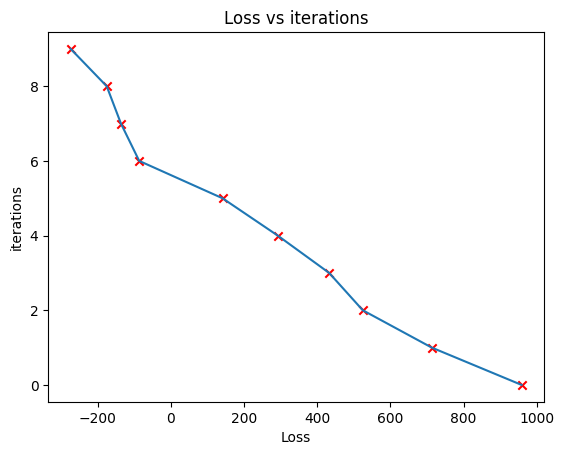

In [19]:
plt.scatter(loss,itr,color='r',marker='x')
plt.plot(loss,itr)
plt.xlabel("Loss")
plt.ylabel("iterations")
plt.title("Loss vs iterations")
plt.show()

In [20]:
u = 4
v = w*u + b
print(v)

25.664203697726425


In [21]:
new_x = np.tile(x,(1,4))
new_x[:,1] = new_x[:,1]**2
new_x[:,2] = new_x[:,2]**3
new_x[:,3] = new_x[:,3]**4
new_y =  y

In [22]:
print(new_x)
print(new_y)

[[       2        4        8       16]
 [       6       36      216     1296]
 [      10      100     1000    10000]
 [      13      169     2197    28561]
 [      17      289     4913    83521]
 [      38     1444    54872  2085136]
 [      65     4225   274625 17850625]
 [      73     5329   389017 28398241]
 [      76     5776   438976 33362176]
 [      80     6400   512000 40960000]]
[[973]
 [750]
 [584]
 [509]
 [391]
 [358]
 [282]
 [277]
 [255]
 [179]]


In [23]:
def sgd_poly(x, y, iteration=100, learning_rate=0.0001):
    weight = []
    costs = []
    curr_w1 = np.array([0.1, 0.1, 0.1, 0.1])
    curr_w0 = 0.01
    m = y.shape[0]
    for i in range(iteration):
        for j in range(m):
            y_hat = np.dot(curr_w1, x[j]) + curr_w0
            cost = np.mean((y[j] - y_hat) ** 2)
            
            w1_deri = -(2 / m) * np.sum(x[j] * (y[j] - y_hat))
            w0_deri = -(2 / m) * np.sum(y[j] - y_hat)

            curr_w1 = curr_w1 - (learning_rate * w1_deri)
            curr_w0 = curr_w0 - (learning_rate * w0_deri)
            
            weight.append(curr_w1.copy())
            costs.append(cost)
            
    plt.plot(weight, costs)
    # plt.scatter(weight, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
    
    return curr_w1, curr_w0

C:\Users\GAURAV PRAJAPATI\AppData\Local\Temp\ipykernel_7676\2374865149.py:10: RuntimeWarning: overflow encountered in square
  cost = np.mean((y[j] - y_hat) ** 2)
C:\Users\GAURAV PRAJAPATI\AppData\Local\Temp\ipykernel_7676\2374865149.py:12: RuntimeWarning: overflow encountered in multiply
  w1_deri = -(2 / m) * np.sum(x[j] * (y[j] - y_hat))
C:\Users\GAURAV PRAJAPATI\AppData\Local\Temp\ipykernel_7676\2374865149.py:15: RuntimeWarning: invalid value encountered in subtract
  curr_w1 = curr_w1 - (learning_rate * w1_deri)


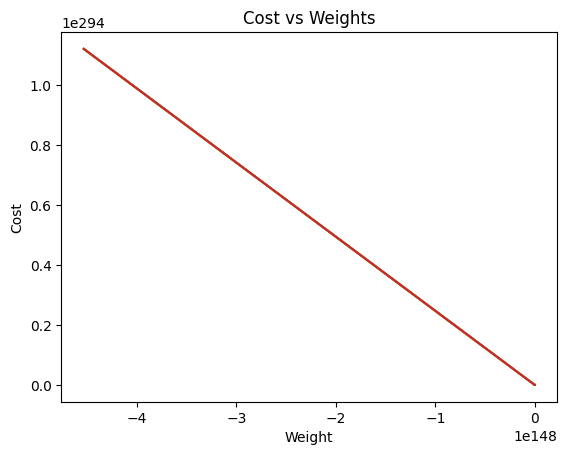

w =  [nan nan nan nan]
b =  nan


In [24]:
w,b = sgd_poly(new_x,new_y)
print("w = " , w)
print("b = " , b)